# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 20 баллов




-----

In [1]:
# Bot check

# HW_ID: phds_hw7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(font_scale=1.3, palette='Set2')
import sklearn.linear_model
red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

# Теоретическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 1

В условиях задач 2, 3 и 6 из предыдущего домашнего задания постройте асимптотические доверительные интервалы, которые можно использовать на практике (в формулах не должно быть $\theta$).

ДИ уже были построены в предыдущей домашке. Выпишем ответы:

2.
$$\theta^\pm = \lim_{n\to+\inf}\overline{X} \pm \mathcal{t}_{\frac{1+\alpha}{2}, n - 1}\frac{S}{\sqrt{n}} = \overline{X} \pm \mathcal{z}_{\frac{1\pm\alpha}{2}}\frac{S}{\sqrt{n}},\qquad\lim_{n\to+\inf}\mathbb{P}(\theta\in\left[\theta^-, \theta^+\right]) = \alpha$$
3.
$$\mathbb{P}(\theta^- < \eta_{(n)} < 1) = 1 - (\theta^-)^n = \alpha \quad \Rightarrow \quad \theta^- = \sqrt[n]{1 - \alpha} \quad \Rightarrow \quad \theta \in \left[X_{(n)}, \frac{X_{(n)}}{1 + \sqrt[n]{1 - \alpha}}\right]$$

# Практическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 2

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [3]:
df=pd.read_csv('airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [4]:
df[['Ozone','Solar.R', 'Wind', 'Temp']].describe().round(2)

,Ozone,Solar.R,Wind,Temp
count,116.00,146.00,153.00,153.00
mean,42.13,185.93,9.96,77.88
std,32.99,90.06,3.52,9.47
min,1.00,7.00,1.70,56.00
25%,18.00,115.75,7.40,72.00
50%,31.50,205.00,9.70,79.00
75%,63.25,258.75,11.50,85.00
max,168.00,334.00,20.70,97.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Самый подозрительный тут ozone

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

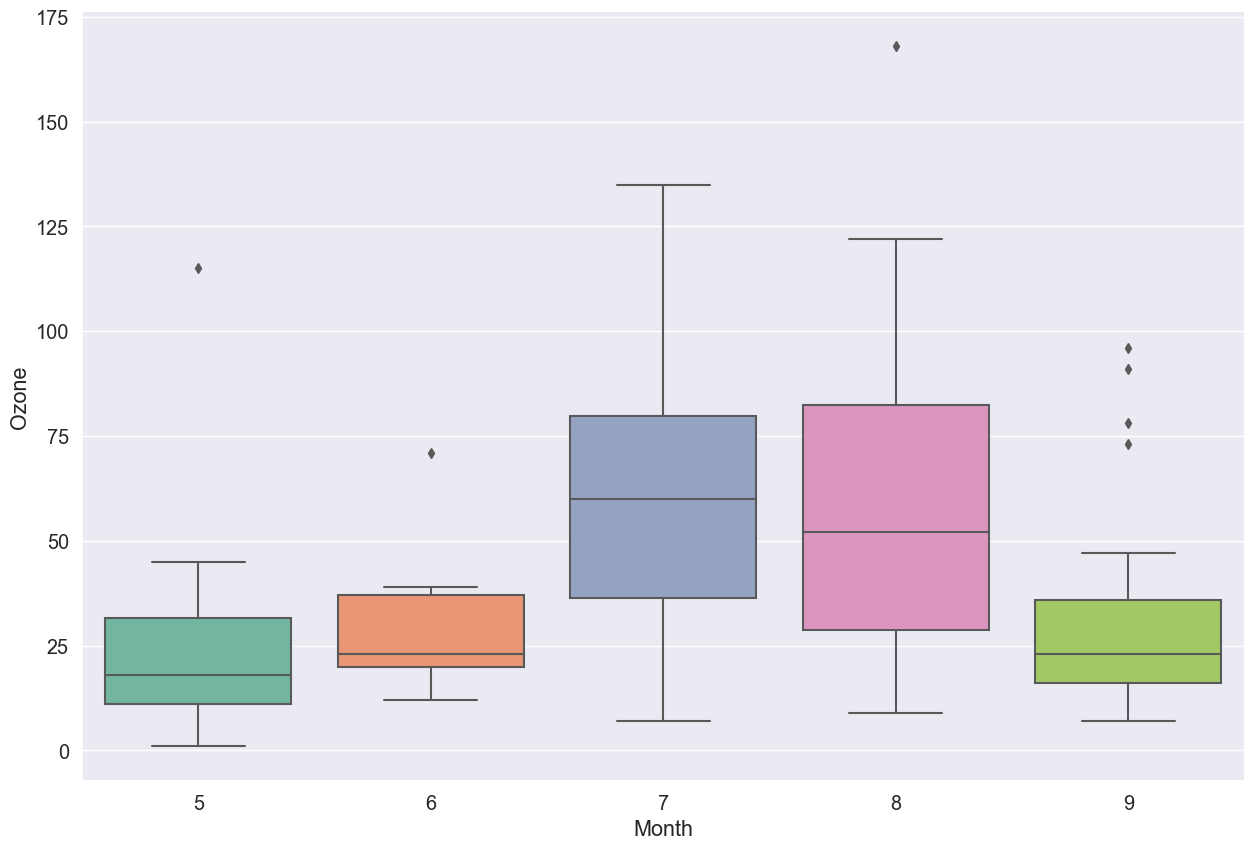

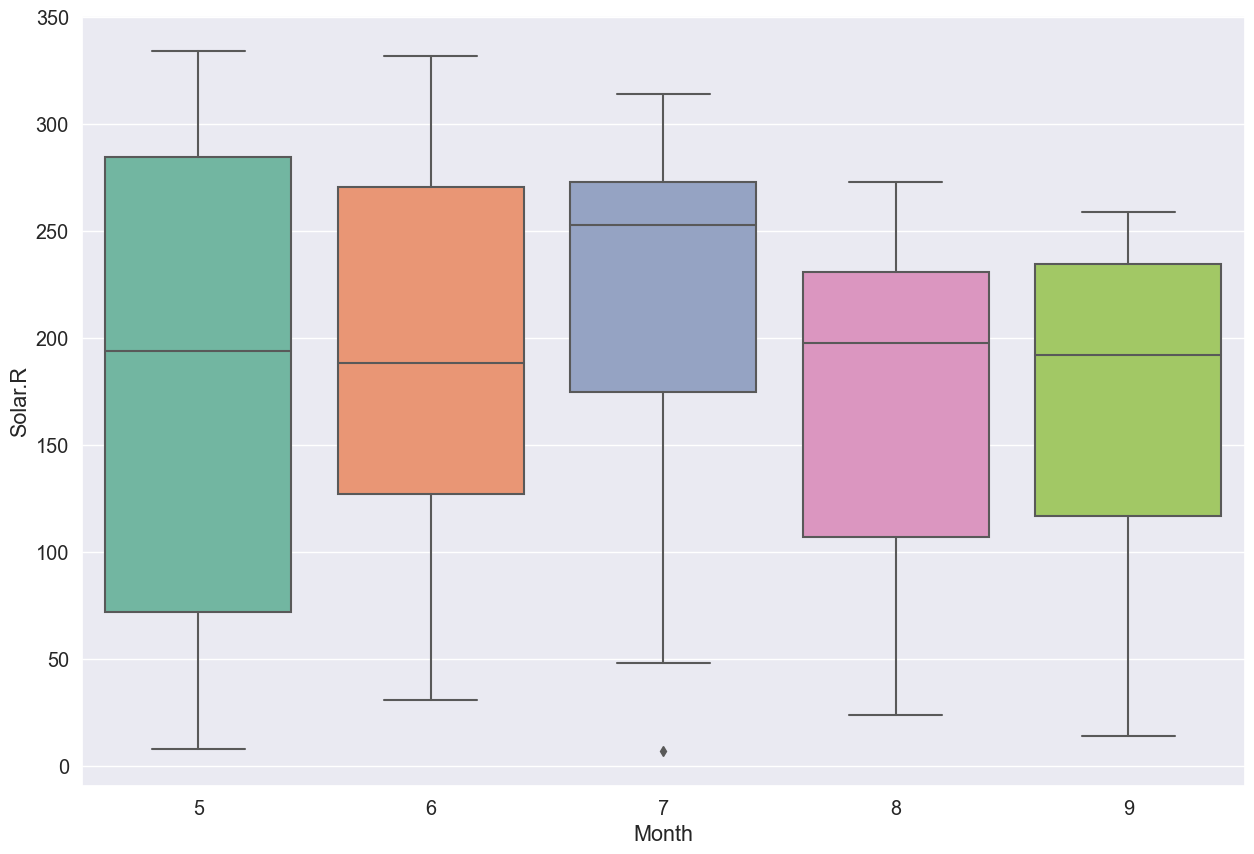

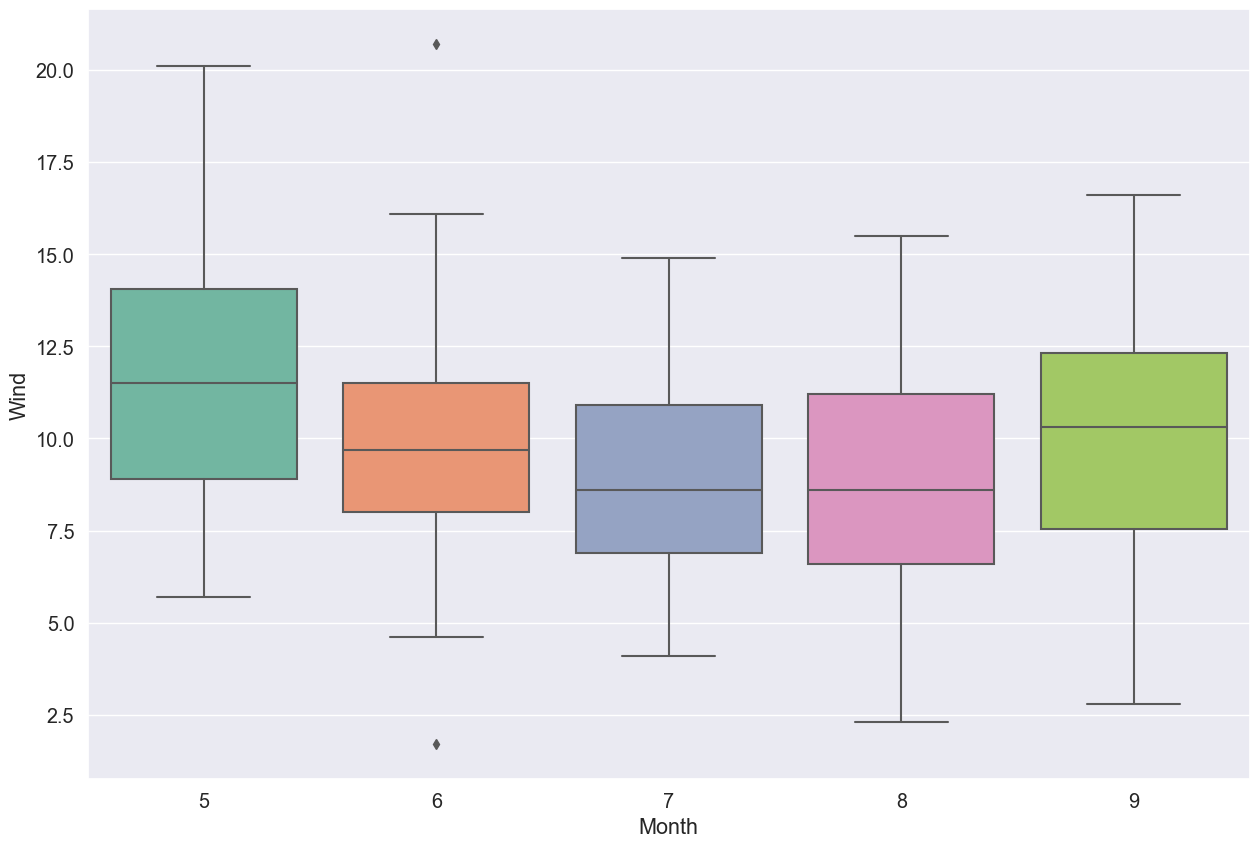

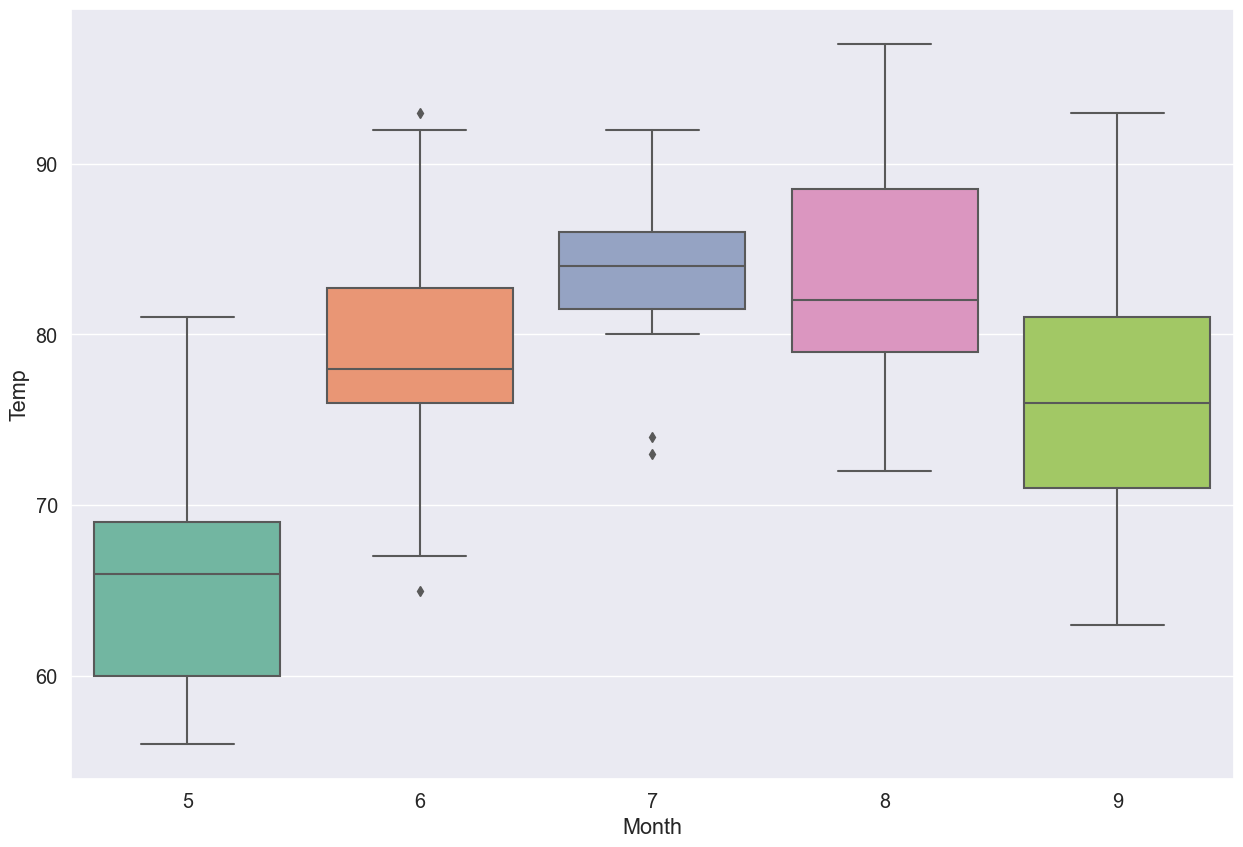

In [5]:
for feature in ['Ozone', 'Solar.R', 'Wind', 'Temp']:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df, x = 'Month', y = feature,  orient='v')

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** Ящики показывают квантили 0.25 -- 0.75. Усы -- квантили 0.05 -- 0.95. Также на ящик нанесена медиана.

Видим, что выбросов у озона действительно больше всего -- 4 штуки. Причём все они в сентябре.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните:
- выборочное среднее;
- выборочную медиану;

In [6]:
print("Ozone mean: ", df['Ozone'].mean() )
print("Ozone median: ", df['Ozone'].median())

Ozone mean:  42.12931034482759
Ozone median:  31.5


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Медиана гораздо менее чувствительна к выбросам, чем среднее. А выбросы есть, как мы видели

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Ну, вообще, погода, конечно же зависит от своего предыдущего состояния. Но, возможно, из-за её хаотичности и временного параметра порядка 2х недель наблюдения в каком-то пределе можно считать независимыми.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** Есть такая величина -корреляция. И, соответственно, корелляционная матрица для признаков. В жизни, наверняка, вообще очень мало прям совсем независимых величин, при этом не бывает и абсолютно скореллированных. Так что всё зависит от степпени корелляции. Корелляция может существенно ухудшать предсказания. Это мы уже видили, когда знакомились с линейными регрессиями и мультиколлинеарностью.
Борются с этим обычно выявляя эти связи между признаками и исключая какие-то из них.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** 

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

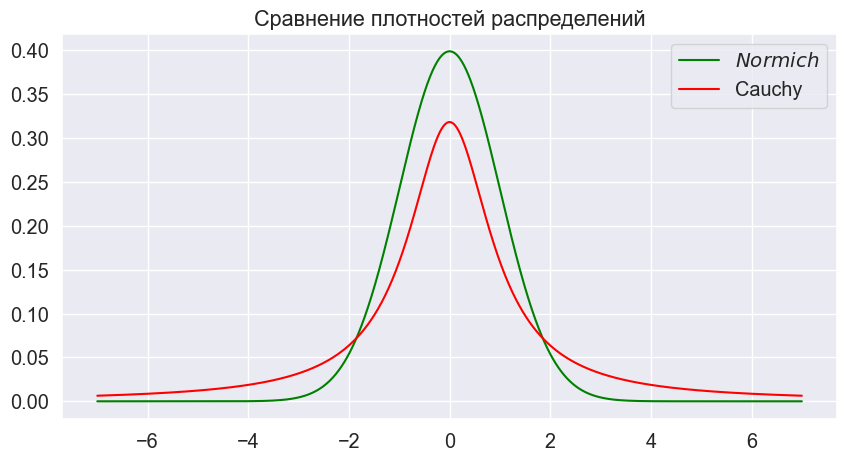

In [7]:
plt.figure(figsize=(10, 5))

grid = np.linspace(-7, 7, 1000)
plt.plot(grid, sps.norm.pdf(grid), color='green', label='$Normich$')
plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='Cauchy')

plt.title('Сравнение плотностей распределений')
plt.legend()

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [8]:
sample_count = 100000
sample_size = 30

grid = np.linspace(-5, 5, 500)

norm_samples = sps.norm.rvs(size=(sample_count, sample_size))

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

In [9]:
norm_means = np.mean(norm_samples, axis = 1)

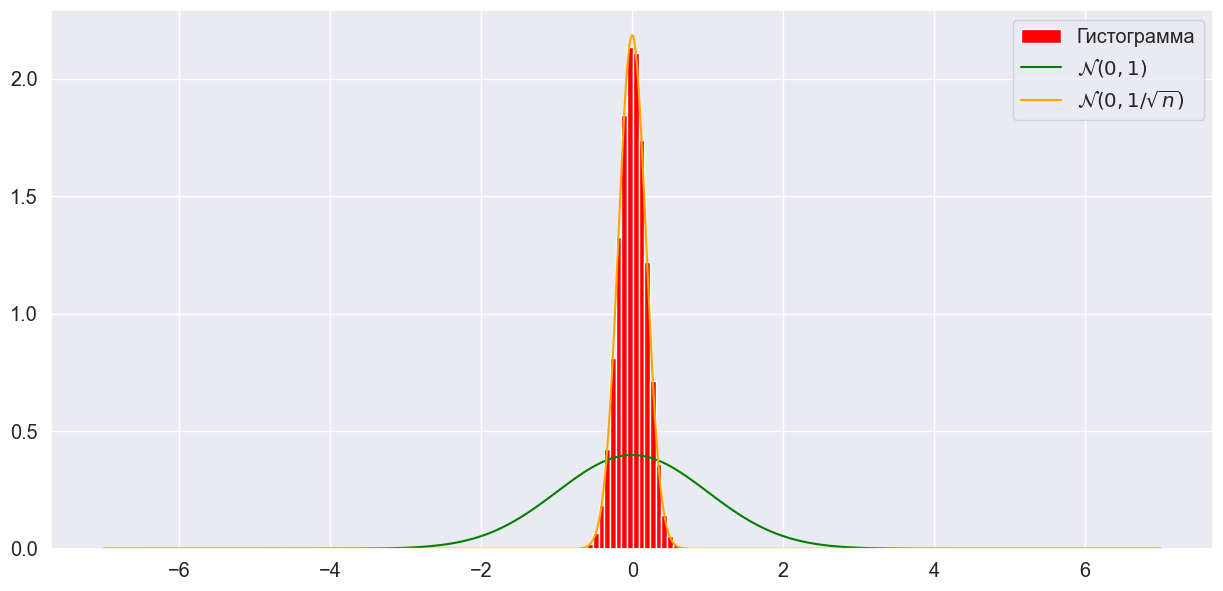

In [34]:
plt.figure(figsize=(15, 7))

plt.hist(norm_means, bins=20, density = True, color='red', label = "Гистограмма")
plt.plot(grid, sps.norm.pdf(grid), color='green', label='$\mathcal{N}(0, 1)$ ')
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1 / 30 ** 0.5), color='orange', label='$\mathcal{N}(0, 1 / \sqrt{n})$ ')

plt.legend()
plt.show()

**Вывод:** Выборочное среднее с.н.р. само не имеет стандартного нормального распределения. Из теории мы знаем, что на самом деле оно распределено как $\mathcal{N}(0, \frac{1}{\sqrt{n}})$

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [38]:
sample_size = 30
cauchy_samples = sps.cauchy.rvs(size=(sample_count, sample_size))
cauchy_means = np.mean(cauchy_samples, axis = 1)

Построим аналогичный график.

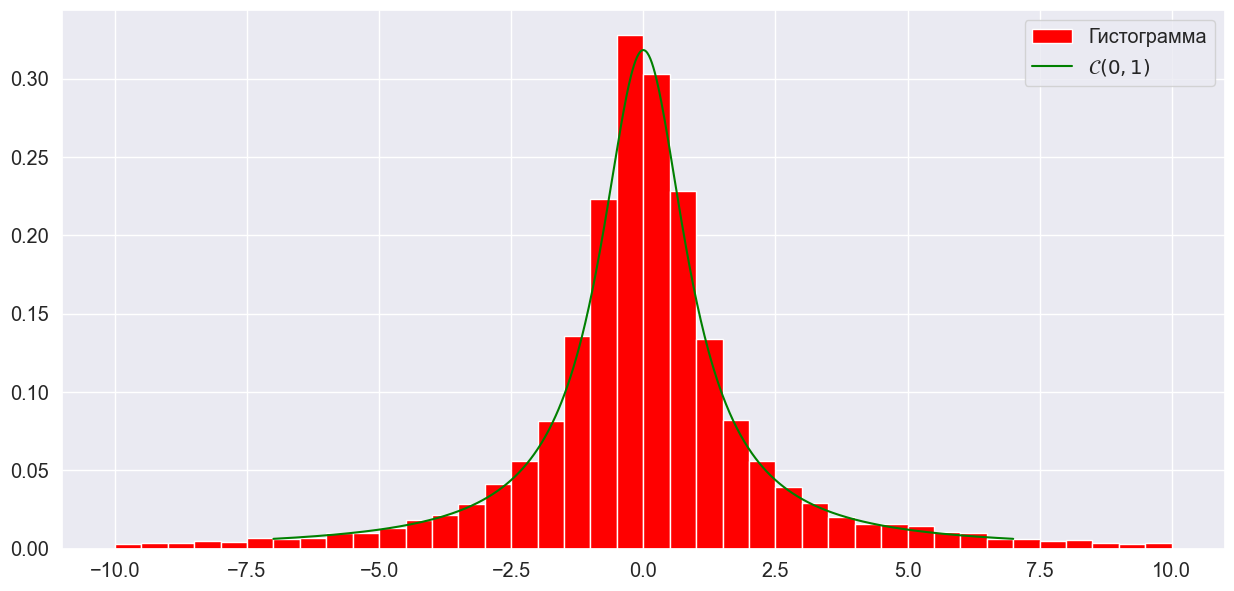

In [39]:
plt.figure(figsize=(15, 7))

plt.hist(cauchy_means, bins=40, density = True, color='red', label = "Гистограмма", range = (-10, 10))
plt.plot(grid, sps.cauchy.pdf(grid), color='green', label='$\mathcal{C}(0, 1)$')

plt.legend()
plt.show()

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:** Как видим, распределение Коши не имеет дисперсии и его выборочное среднее не распределено нормально, а распределено всё по тому же распределению Коши. Распределение Коши устойчиво, а нормальное -- нет.


## Задание 4


**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

Датасет большой, поэтому для ускорения расчетов можно взять подвыборку размера ~ 1000 

**Профиль Биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N`
* `ELK_N`




**1.** Постройте для каждого из них гистограммы. Что можно сказать о характере распределения?


In [14]:
df = pd.read_csv("dielectron.csv")
df = df[['E1', 'E2', 'M']]

df.head()

,E1,E2,M
0,58.71410,11.2836,8.94841
1,6.61188,17.1492,15.89300
2,25.54190,15.8203,38.38770
3,65.39590,25.1273,3.72862
4,61.45040,13.8871,2.74718


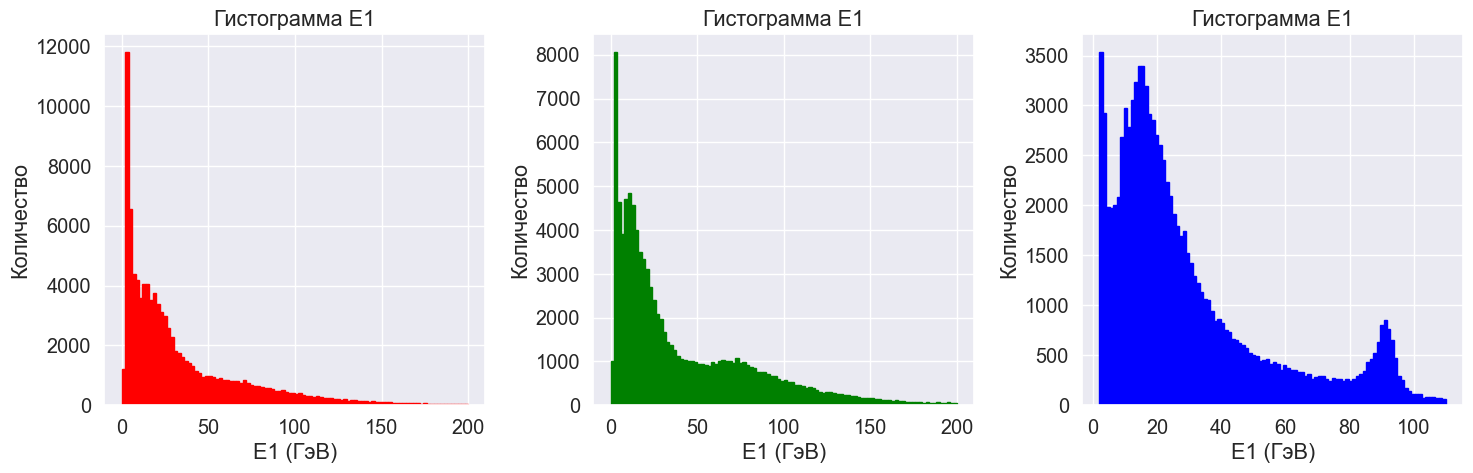

In [15]:
plt.figure(figsize=(15, 5))

# Гистограмма для E1
plt.subplot(1, 3, 1)
plt.hist(df['E1'], bins=100, color='red', range=(0, 200), edgecolor='red')
plt.title('Гистограмма E1')
plt.xlabel('E1 (ГэВ)')
plt.ylabel('Количество')

plt.subplot(1, 3, 2)
plt.hist(df['E2'], bins=100, color='green', range=(0, 200), edgecolor='green')
plt.title('Гистограмма E1')
plt.xlabel('E1 (ГэВ)')
plt.ylabel('Количество')

plt.subplot(1, 3, 3)
plt.hist(df['M'], bins=100, color='blue', edgecolor='blue')
plt.title('Гистограмма E1')
plt.xlabel('E1 (ГэВ)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

**Ответ:** Ну, оно не симметричное. Из знакомого только экспоненциальное приходит на ум, но на гистограммах явно видны некие пички.

**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов.
Выпишите соответствующие формулы. 

**Описание**:
1. Зафиксируем число $B$.

2. Генерируем $B$ выборок из дискретного равномерного распределения с целыми значениями $U[0, n]$ $I^{1}, \dots, I^{B}$

3. Создаём $B$ выборок из $X$ таким образом: $Y_k = \{X_{I_1^{k}}, \dots, X_{I_n^{k}}\},~k=\overline{1, B}$.

2. Для каждой бутстрепной выборки вычисляем $\widehat{\theta}_k = \frac{1}{n}\sum_{i=1}^{n}X_{I_i^{k}}$.

3. Получаем эмпирическое распределение $\widehat{\theta}_1, \dots, \widehat{\theta}_B$ для $\widehat{\theta}$.

Центральный интервал

$\theta = G(\mathrm{P}),~\widehat{\theta}=G\left(\widehat{\mathrm{P}}_n\right)$ - оценка с помощью подстановки.

ДИ:
$$C = \left(2\widehat{\theta} - \theta_{\lceil B\frac{1 + \alpha}{2}\rceil}, 2 \widehat{\theta} - \theta_{\lfloor B\frac{1 - \alpha}{2}\rfloor}\right)$$


Нормальный интервал

$\widehat{\theta}$ -- а.н.о. с АД $\sigma^2(\theta)$, $\widehat{\sigma}_B$ -- бутстрепная оценка дисперсии.

ДИ:
$$C = \left(\widehat{\theta} - z_{\frac{1 + \alpha}{2}}\sqrt{\widehat{\sigma}_B}, \widehat{\theta} + z_{\frac{1+\alpha}{2}}\sqrt{\widehat{\sigma}_B}\right)$$

Квантильный интервал

$\widehat{\theta}$ -- оценка $\theta$.

ДИ:
$$C = \left(\theta_{\lfloor B\frac{1 - \alpha}{2}\rfloor}^*, \theta_{\lceil B\frac{1 + \alpha}{2}\rceil}^*\right)$$

**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$. 

Для ускорения расчетов можете использовать broadcasting (не является обязательным требованием). Учите, что в таком случае внутри функции у вас могут получиться очень большие матрицы, из-за которых может кончиться оперативная память. 

In [16]:
def bootstrap(sample, B=100_000): 
    '''
    Считает бутстрепные оценки для исходной выборки

    :param sample: исходная выборка
    :param B: количество бутстрепных 
    :return bootstrap_estimations: оценки по бутстрепным выборкам
    '''   

    estimations = np.array([np.random.choice(sample, size=len(sample), replace=True).mean() for i in range(B)])
    return estimations


**4.** Реализуйте три типа бутстрепных доверительных интервалы в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. 

In [17]:
def bootstrap_normal_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу нормального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    z = sps.norm.ppf((1 + alpha) / 2)
    sample_std = np.std(bootstrap_estimations, ddof=1)
    
    return theta - z * sample_std, theta + z * sample_std

    
def bootstrap_central_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу центрального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    lower_bound = np.percentile(bootstrap_estimations, (1 - alpha) * 50)
    upper_bound = np.percentile(bootstrap_estimations, (1 + alpha) * 50)

    return 2 * theta - upper_bound, 2 * theta - lower_bound

    
def bootstrap_quantile_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу квантильного бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   
    left = np.quantile(bootstrap_estimations, (1 - alpha) / 2)
    right = np.quantile(bootstrap_estimations, (1 + alpha) / 2)
    
    return left, right

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

In [18]:
dat = pd.DataFrame(index = ['normal', 'central', 'quantile', 'theta', 'interval_length'], columns=df.columns)

In [19]:
intervals = {}

for i in df.columns:
    theta = df[i].mean()
    bootstrap_estimations = bootstrap(df[i])

    intervals[i] = {
        'normal interval': bootstrap_normal_confidence_interval(theta, bootstrap_estimations),
        'central interval': bootstrap_central_confidence_interval(theta, bootstrap_estimations),
        'quantile interval': bootstrap_quantile_confidence_interval(theta, bootstrap_estimations),
        }

for i in intervals.keys():
    print(f'intervals for {i}')
    print(f"\tnormal interval:\t[{round(intervals[i]['normal interval'][0], 2)}, {round(intervals[i]['normal interval'][1], 2)}]")
    print(f"\tcentral interval:\t[{round(intervals[i]['central interval'][0], 2)}, {round(intervals[i]['central interval'][1], 2)}]")
    print(f"\tquantile interval:\t[{round(intervals[i]['quantile interval'][0], 2)}, {round(intervals[i]['quantile interval'][1], 2)}]\n")

intervals for E1
	normal interval:	[36.18, 36.69]
	central interval:	[36.18, 36.69]
	quantile interval:	[36.18, 36.69]

intervals for E2
	normal interval:	[43.71, 44.29]
	central interval:	[43.71, 44.29]
	quantile interval:	[43.71, 44.29]

intervals for M
	normal interval:	[nan, nan]
	central interval:	[nan, nan]
	quantile interval:	[nan, nan]



**Вывод:** 

Визуализируйте бутстрепные интервалы для каждого признака. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию

In [20]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    color = color if color else 'purple'
    plt.plot(left, color=color, label='Доверительный интервал')
    plt.plot(right, color=color)
    
    if sample is not None:
        plt.scatter(range(1, len(sample) + 1), sample, s=5, label=sample_label)

    if estimation is not None:
        plt.plot(estimation, color=red, label=estim_label)

    plt.xlabel('Размер выборки')
    plt.ylabel('Значения')
    plt.title(interval_label)
    plt.ylim(ylim)
    
    plt.legend()
    plt.show()
    

**Решение:**

In [21]:
dff = df.sample(n=1000, random_state=1)

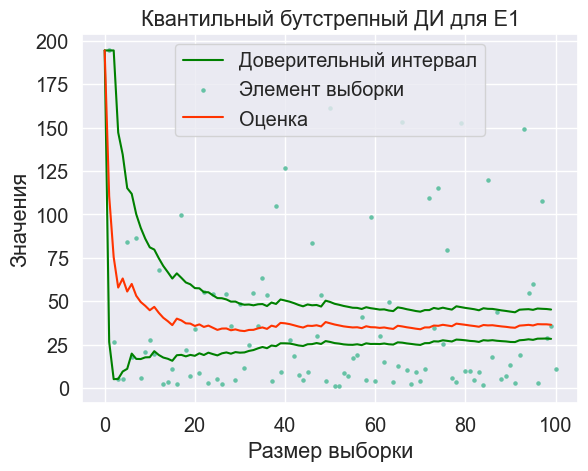

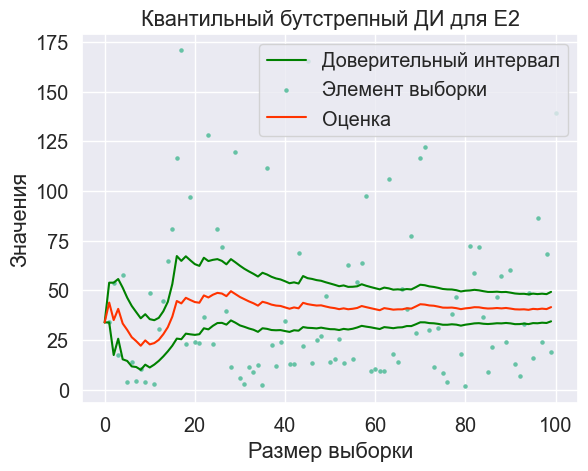

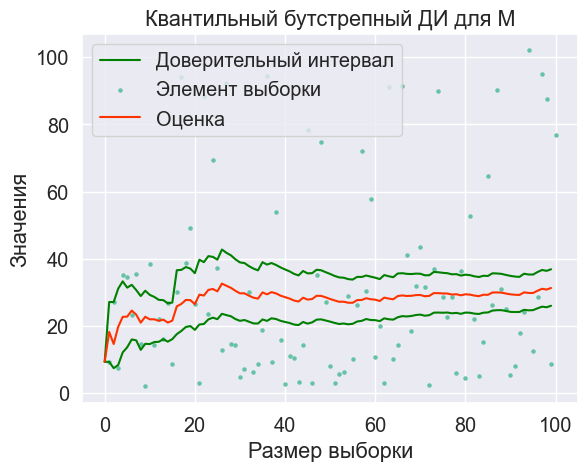

In [22]:
N = 100
for col in dff.columns:
    sample = dff[col].sample(N, random_state=42).values

    left = []
    right = []
    estimations = []

    for n in range(1, N + 1):
        subsample = sample[:n]
        bootstrap_estimations = bootstrap(subsample)
        theta = np.mean(subsample)
        left_bound, right_bound = bootstrap_quantile_confidence_interval(theta, bootstrap_estimations)

        left.append(left_bound)
        right.append(right_bound)
        estimations.append(theta)

    draw_confidence_interval(left, right, estimation=estimations, sample=sample, ylim=(None, None),
                             estim_label='Оценка', sample_label='Элемент выборки', color='green',
                             interval_label=f'Квантильный бутстрепный ДИ для {col}')

**Вывод:** Видим, что ДИ действительно асимпотические, при малых размерах выборок ДИ нестабильны

### <b><font color="orange">Сложная часть</font></b>

## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения,
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду. Сделайте выводы о сходствах и различиях распределений

**Решение:**

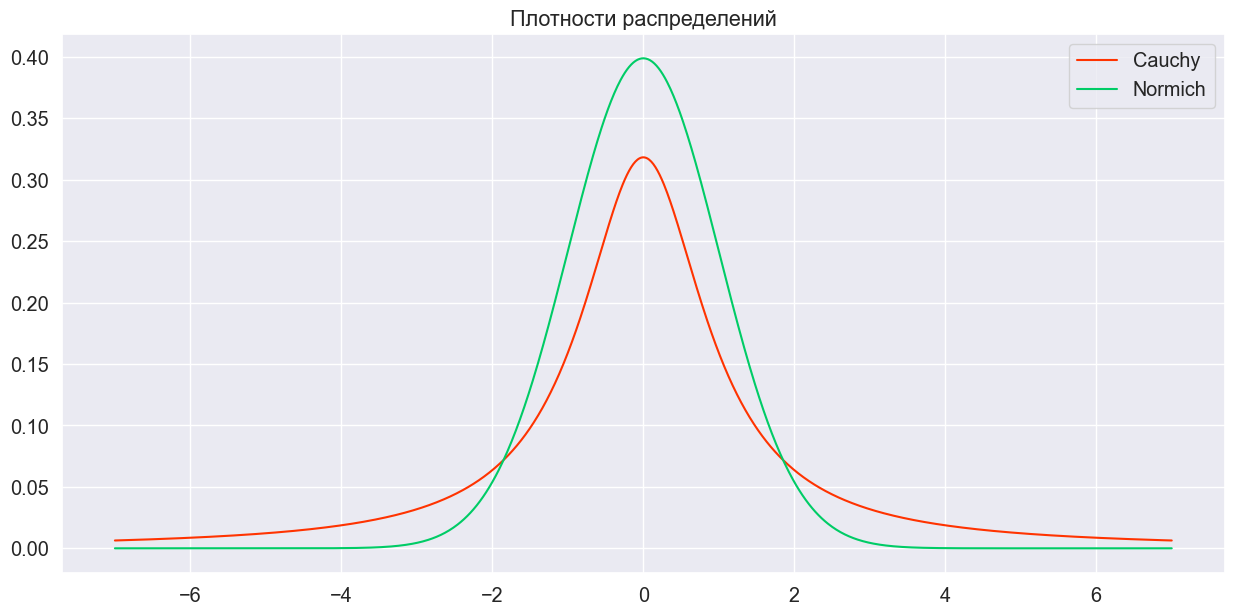

In [23]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(15, 7))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Cauchy')
plt.plot(grid, sps.norm.pdf(grid), color=green, label='Normich')
plt.title('Плотности распределений')
plt.legend()
plt.show()

**Вывод:** Ещё раз посмотрели на тяжёлые хвосты Коши

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

In [24]:
def sigma(alpha):
    return 2 * ((alpha / np.sin(np.pi * alpha) + np.cos(np.pi * alpha) / np.pi) / np.sin(np.pi * alpha) - 0.5) / (1 - 2 * alpha) ** 2

In [26]:
alphas_grid = np.linspace(0.01, 0.49, 1000)
sigmas_grid = sigma(alphas_grid)

k, min_sigma = min(enumerate(sigmas_grid), key=lambda x: x[1])
min_alpha = alphas_grid[k]

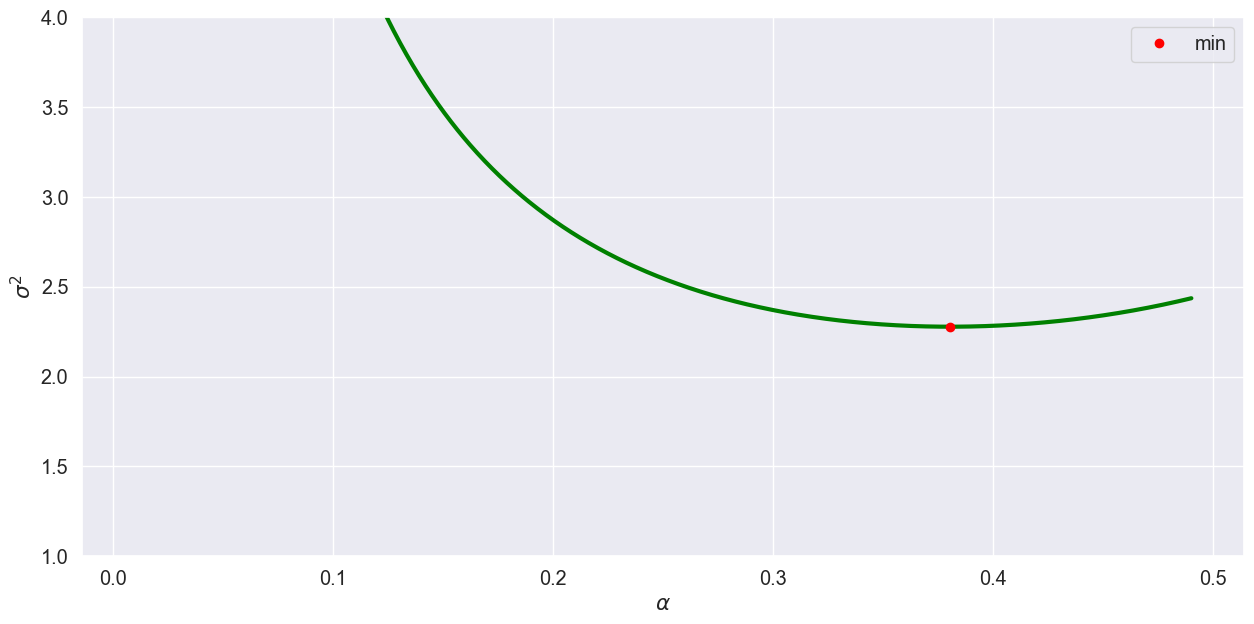

In [27]:
plt.figure(figsize=(15, 7))

plt.plot(alphas_grid, sigmas_grid, lw = 3, color = 'green')
plt.plot(min_alpha, min_sigma, 'ro', label = 'min')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2$')
plt.ylim((1, 4))
plt.legend()
plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

In [28]:
print(f'alpha*: {min_alpha}')
print(f'sigma(alpha*): {min_sigma}')

alpha*: 0.38045045045045045
sigma(alpha*): 2.2776452886158283


**Ответ:** Ответ распечатан

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям.

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

**Вывод:** 

## Задача 6
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример:* вы проводите 100 экспериментов (создаете 100 выборок), для каждой выборки рассчитываете АДИ для параметра $\theta$. Истинный параметр попадает в 93 интервала из 100, значит реальный уровень доверия в этом случае будет 0.93.

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка. 

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)? 

**Ответ:** $\varepsilon\backsim\frac{1}{\sqrt{n}}\quad\Rightarrow\quad n = \frac{1}{0.01^2} = 10000$

Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [40]:
theta = 0
sample_size = 100
sample_count = 10000

X = np.random.normal(loc=theta, scale=1, size=(sample_count, sample_size))

Рассмотрим $\hat{\theta} = \overline{X}$.

Напоминание из теории:
$$\hat{\theta} - \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}} < \theta < \hat{\theta} + \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}}$$

Посчитайте $z$ (используйте функцию `.ppf`)

In [41]:
alpha = 0.95
z = sps.norm.ppf((1 + alpha) / 2)
z

1.959963984540054

Постройте график зависимости реального уровня доверия от размера выборки.

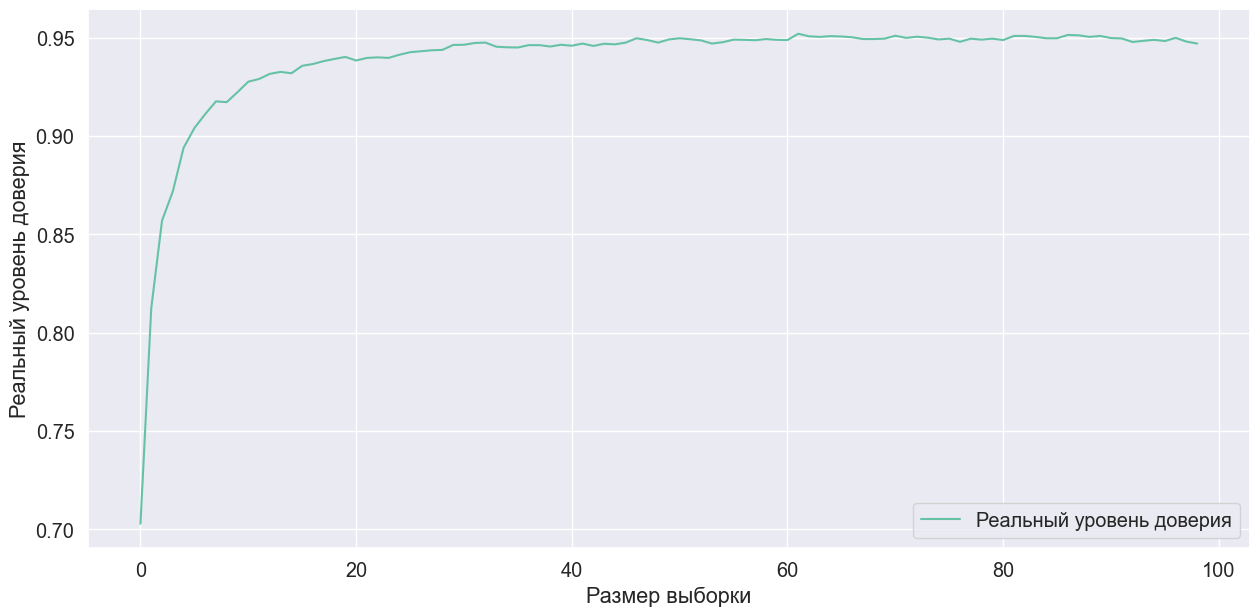

In [43]:
real_confidence_levels = []

for n in range(2, sample_size + 1):
    left = np.mean(X[:, :n], axis=1) - z * np.std(X[:, :n], axis=1, ddof=1) / np.sqrt(n)
    right = np.mean(X[:, :n], axis=1) + z * np.std(X[:, :n], axis=1, ddof=1) / np.sqrt(n)

    real_confidence_level = np.mean(np.logical_and(left <= theta, theta <= right))
    real_confidence_levels.append(real_confidence_level)

plt.figure(figsize=(15, 7))
plt.plot(real_confidence_levels, label="Реальный уровень доверия")
plt.xlabel("Размер выборки")
plt.ylabel("Реальный уровень доверия")

plt.legend()
plt.show()

Сделайте выводы.

**Вывод:** И правда получили, что реальный уровень доверия стремится к теоретическому (0.95) при больших объёмах выборок. Теоория как всегда согласуется с практикой. Причём, видно, что "большой" размер выборки начинается уже примерно с 20-40 элементов в ней. Что достаточно неплохо